## Plotting data and Autocorrelation Functions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
from statsmodels.tsa import stattools as tsa
%matplotlib inline

In [3]:
sum = 0
for i in range(1,101) :
    sum += i

In [4]:
sum

5050

In [5]:
y = np.random.randn(5)
print(y)

[-0.82152532 -0.30374628 -0.31866813  1.50260273  1.58331331]


In [6]:
y.var()

1.018838759159459

In [7]:
y.mean()

0.328395264404363

-> **sudo random number**

AR(1) 모형을 만들어 보자

$$X_t = 0.3X_{t-1} + r_t$$
- AR(1) : stationary

$$X_t = r_t + 0.3r_{t-1} + 0.3^2r_{t-2} + 0.3^3r_{t-3} + ...$$

stationary process의 특징 : coefficient가 1보다 작으면 안정적이다

In [8]:
phi = 0.3
ts_length = 100
current_x = 0
x_values = []

for i in range(ts_length + 1) :
    x_values.append(current_x)
    current_x = phi * current_x + np.random.randn()

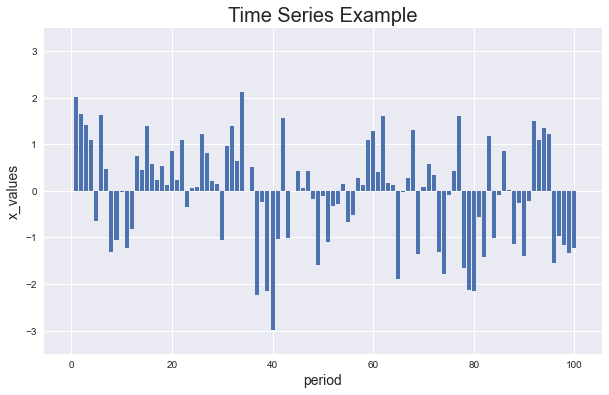

In [12]:
plt.style.use('seaborn')
plt.figure(figsize = (10,6))
plt.bar(range(ts_length + 1), x_values)
plt.xlabel('period', fontsize = 14)
plt.ylabel('x_values', fontsize = 14)
plt.title('Time Series Example', fontsize = 20)
plt.ylim([-3.5,3.5])
plt.show()

Random walk down wall street - 1980s book

**Random Walk** : 확률론에서 나오는 단어. Stochastic Process

$$X_t = X_{t-1} + r_t$$
$$r_t -> iid   N(0,\sigma ^ 2)$$
<center> 일때, $X_t$를 확률보행 과정이라고 한다.</center>

In [20]:
phi = 1
ts_length = 100
current_x = 0
x_rw_values = []

for i in range(ts_length + 1) :
    x_rw_values.append(current_x)
    current_x = phi * current_x + np.random.randn()

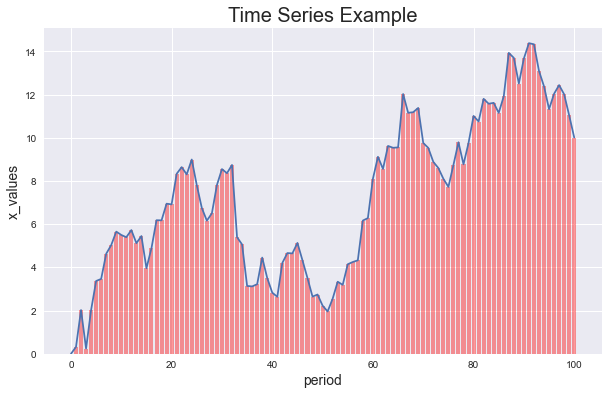

In [23]:
plt.style.use('seaborn')
plt.figure(figsize = (10,6))
plt.bar(range(ts_length + 1), x_rw_values, color = 'r', alpha = 0.4)
plt.plot(range(ts_length + 1), x_rw_values)
plt.xlabel('period', fontsize = 14)
plt.ylabel('x_values', fontsize = 14)
plt.title('Time Series Example', fontsize = 20)
plt.show()

if phi >= 1, time series is non-stationary

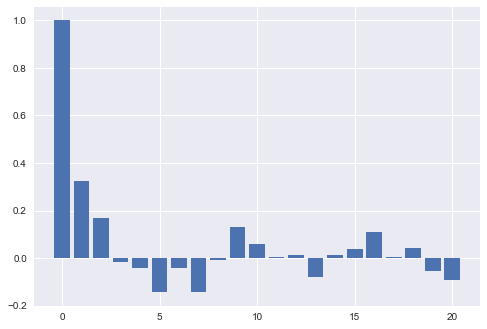

In [40]:
n_lags = 20
atcf_qs = tsa.acf(x_values, nlags = n_lags, qstat = True)
#atcf_qs[0] : values of ACF
#atcf_qs[1] : values of q-test
#atcf_qs[2] : p-values of the q-test
#박스 융 테스트의 귀무가설은 stationary하다는 것이다
temp = n_lags + 1

plt.bar(range(temp), atcf_qs[0])
plt.show()

Lag가 커짐에 따라서 감소하는 모습을 보인다

In [41]:
atcf_qs[2]

array([0.0009741 , 0.00098088, 0.00306461, 0.00700457, 0.00611782,
       0.01153229, 0.0090433 , 0.01624837, 0.0141643 , 0.02065184,
       0.03267654, 0.04915422, 0.05806766, 0.08181339, 0.10701192,
       0.10118538, 0.13386331, 0.16497873, 0.19359688, 0.1935224 ])

검정력 (power) : null이 틀렸을 때, null이 틀렸다고 할 확률

sample size가 커질수록 검정력이 커진다.

p-value의 값이 들쭉날쭉 하다 -> 검정력이 약하다는 뜻이다
- sample size가 작아서 검정력이 작게 나온 것이라고 볼 수 있다

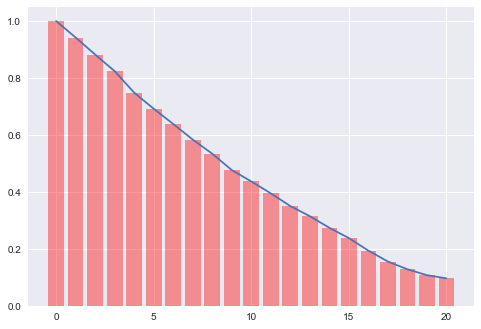

In [43]:
n_lags = 20
atcf_qs = tsa.acf(x_rw_values, nlags = n_lags, qstat = True)
#atcf_qs[0] : values of ACF
#atcf_qs[1] : values of q-test
#atcf_qs[2] : p-values of the q-test
#박스 융 테스트의 귀무가설은 stationary하다는 것이다
temp = n_lags + 1

plt.bar(range(temp), atcf_qs[0], color = 'r', alpha = 0.4)
plt.plot(range(temp), atcf_qs[0])
plt.show()

random walk의 경우 memory가 강하기 때문에 감소함수의 모양을 띈다

In [44]:
atcf_qs[2]

array([7.38678216e-022, 1.56812393e-038, 4.43832439e-053, 4.93127326e-065,
       3.15664583e-075, 7.22374571e-084, 5.00279040e-091, 6.00814523e-097,
       1.52225850e-101, 2.53093815e-105, 2.66657956e-108, 1.67389735e-110,
       3.72933402e-112, 3.09461740e-113, 7.09602501e-114, 4.77223574e-114,
       6.81573247e-114, 1.49257488e-113, 4.25298228e-113, 1.34949100e-112])

In [51]:
kospi = pd.read_excel('KOSPI.xlsx').T

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [52]:
kospi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
지수종류별(1),KOSPI,KOSPI 200,V-KOSPI 200,KOSPI 100,KOSPI 50,시가총액규모별,NaN,NaN,F-KOSPI 200,F-KOSPI 200 인버스지수,KOSPI 200 레버리지지수,KOSPI 200 커버드콜 지수,KOSPI 200 프로텍티브풋 지수,동일가중지수,NaN,NaN
지수종류별(2),소계,소계,소계,소계,소계,대형주,중형주,소형주,소계,소계,소계,소계,소계,KOSPI 200,KOSPI 100,KOSPI 50
2022.07,2451.5,323.31,17.79,2434.71,2215.37,2419.01,2804.21,2314.17,1638.38,599.4,269.6,326.96,154.12,2106.12,1911.92,1632.55
2022.06,2332.64,307.2,23.9,2309.98,2088.88,2290.09,2748.79,2214.18,1557.34,631.03,244.44,313.84,146.87,2053.4,1874.44,1570.11
2022.05,2685.9,354.54,17.26,2664.55,2422.86,2638.4,3131.48,2595.77,1793.38,549.77,327.8,357.52,159.36,2339.31,2102.77,1813.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013.05,2001.05,261.47,14.16,1980.27,1712.18,1957.26,2276.91,1560.38,1300.89,856.93,260.28,317.63,157.21,1770.28,1842.03,1482.55
2013.04,1963.95,255.72,14.74,1933.75,1666.92,1916.37,2278.68,1509.87,1275.35,873.44,249.82,310.09,154.14,1759.95,1809.79,1443.14
2013.03,2004.89,263.39,14.34,1994.02,1725.39,1975.93,2218.51,1436.77,1313.78,847.75,266.1,318.24,159.95,1765.27,1870.37,1532.68
2013.02,2026.49,268.01,15.19,2033.29,1760.52,2015.1,2138.47,1382.36,1344.57,827.63,276.39,321.64,163.27,1758.52,1910.1,1579.22


In [24]:
import yfinance as yf

In [27]:
df_apple = yf.download('AAPL', start = '2010-01-01', end = '2022-08-31')

[*********************100%***********************]  1 of 1 completed


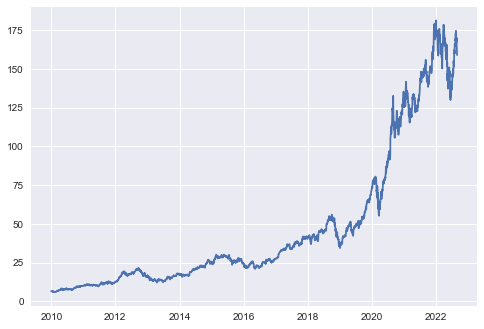

In [39]:
plt.plot(df_apple.loc[:,['Adj Close']])

## 2022.09.15

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [19]:
kospi = pd.read_excel('KOSPI.xlsx')

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [20]:
kospi

,지수종류별(1),지수종류별(2),2022.07,2022.06,2022.05,2022.04,2022.03,2022.02,2022.01,2021.12,...,2013.10,2013.09,2013.08,2013.07,2013.06,2013.05,2013.04,2013.03,2013.02,2013.01
0,KOSPI,소계,2451.50,2332.64,2685.90,2695.05,2757.65,2699.18,2663.34,2977.65,...,2030.09,1996.96,1926.36,1914.03,1863.32,2001.05,1963.95,2004.89,2026.49,1961.94
1,KOSPI 200,소계,323.31,307.20,354.54,355.08,365.61,361.54,357.98,394.19,...,266.91,260.91,251.74,247.99,242.27,261.47,255.72,263.39,268.01,258.07
2,V-KOSPI 200,소계,17.79,23.90,17.26,18.92,17.14,24.41,23.97,16.50,...,14.41,15.38,15.73,16.26,17.11,14.16,14.74,14.34,15.19,15.18
3,KOSPI 100,소계,2434.71,2309.98,2664.55,2667.16,2749.69,2725.83,2709.36,2976.54,...,2025.09,1977.35,1910.21,1874.23,1835.38,1980.27,1933.75,1994.02,2033.29,1958.36
4,KOSPI 50,소계,2215.37,2088.88,2422.86,2431.60,2515.99,2496.85,2501.10,2755.64,...,1752.01,1706.68,1652.99,1611.57,1585.84,1712.18,1666.92,1725.39,1760.52,1691.49
5,시가총액규모별,대형주,2419.01,2290.09,2638.40,2635.31,2714.02,2665.50,2644.18,2905.03,...,2010.42,1968.47,1901.78,1869.50,1825.30,1957.26,1916.37,1975.93,2015.10,1946.50
6,NaN,중형주,2804.21,2748.79,3131.48,3181.97,3199.95,3106.77,2977.37,3296.42,...,2191.13,2198.11,2090.09,2195.89,2104.22,2276.91,2278.68,2218.51,2138.47,2102.81
7,NaN,소형주,2314.17,2214.18,2595.77,2709.81,2618.50,2486.33,2346.65,2577.15,...,1446.43,1469.19,1444.57,1496.51,1444.28,1560.38,1509.87,1436.77,1382.36,1357.66
8,F-KOSPI 200,소계,1638.38,1557.34,1793.38,1800.72,1851.87,1828.27,1804.99,1995.56,...,1315.77,1287.38,1237.35,1224.78,1193.22,1300.89,1275.35,1313.78,1344.57,1290.61
9,F-KOSPI 200 인버스지수,소계,599.40,631.03,549.77,548.29,533.69,541.60,549.40,498.65,...,847.45,865.38,899.20,908.19,932.50,856.93,873.44,847.75,827.63,861.71


In [39]:
x = np.array(kospi.iloc[0,2:])[::-1]

In [52]:
x = x.astype('float')

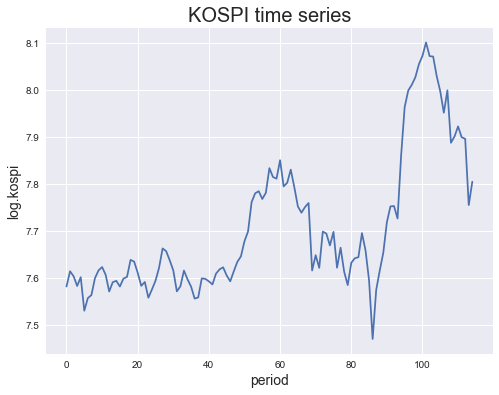

In [55]:
plt.style.use('seaborn')
plt.figure(figsize = (8,6))
plt.plot(np.arange(115), np.log(x))
plt.xlabel('period', fontsize = 14)
plt.ylabel('log.kospi', fontsize = 14)
plt.title('KOSPI time series', fontsize = 20)
plt.show()

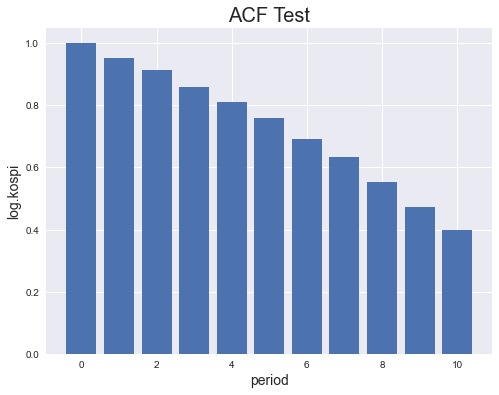

In [58]:
from statsmodels.tsa import stattools as tsa
n_lags = 10
atcf_qs = tsa.acf(np.log(x), nlags = n_lags, qstat = True)
temp = n_lags + 1

plt.figure(figsize = (8,6))
plt.bar(range(temp), atcf_qs[0])
plt.xlabel('period', fontsize = 14)
plt.ylabel('log.kospi', fontsize = 14)
plt.title('ACF Test', fontsize = 20)
plt.show()

**Autocorrelation**이 매우 강하다

- 증권 뿐만이 아닌 채권, 환율 등 금융시장의 데이터는 대부분 memory가 큰 것처럼 보인다. nominal financial data는 random walk와 흡사한 모습을 띈다

In [59]:
atcf_qs[2]

array([4.03118395e-025, 1.62000291e-045, 1.10280785e-063, 8.38070974e-080,
       5.23355813e-094, 9.22241347e-106, 1.58412214e-115, 8.85943369e-123,
       6.92942987e-128, 2.71455473e-131])

**log -> difference : return**

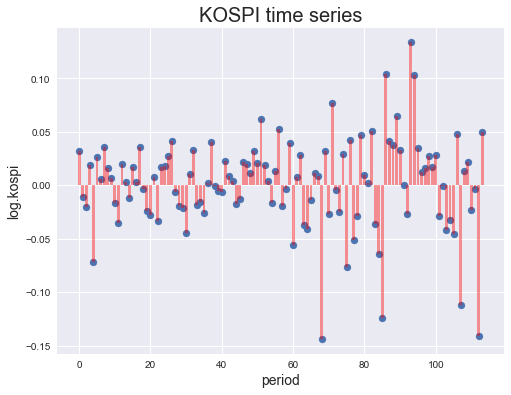

In [66]:
plt.figure(figsize = (8,6))
plt.scatter(np.arange(114), np.diff(np.log(x)))
plt.bar(np.arange(114), np.diff(np.log(x)), alpha = 0.4, color = 'r')
plt.xlabel('period', fontsize = 14)
plt.ylabel('log.kospi', fontsize = 14)
plt.title('KOSPI time series', fontsize = 20)
plt.show()

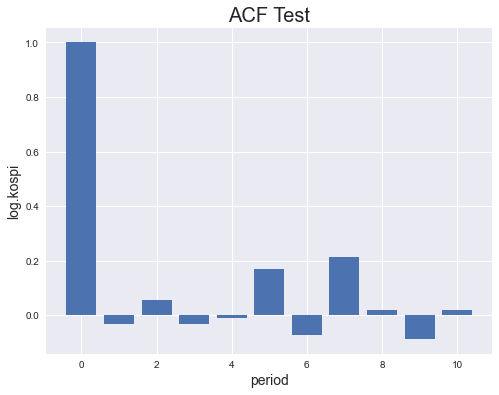

In [68]:
n_lags = 10
atcf_qs = tsa.acf(np.diff(np.log(x)), nlags = n_lags, qstat = True)
temp = n_lags + 1

plt.figure(figsize = (8,6))
plt.bar(range(temp), atcf_qs[0])
plt.xlabel('period', fontsize = 14)
plt.ylabel('log.kospi', fontsize = 14)
plt.title('ACF Test', fontsize = 20)
plt.show()

In [74]:
atcf_qs[2]

array([0.73064779, 0.77960586, 0.89073907, 0.95883035, 0.53827135,
       0.57914792, 0.16521865, 0.23267817, 0.24721192, 0.32129088])

귀무가설 : Correlation이 없다

귀무가설을 기각하지 못하므로, AutoCorrelation이 없다

**White Noise처럼 보이는 데이터** -> 미래를 예측할 수 없다

In [17]:
import pandas_datareader as wb
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
 
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 30)
df_null = wb.DataReader("^KS11", "yahoo", start, end)
df = df_null['Close'].dropna()

In [19]:
df.shift(1)

Date
2021-01-04            NaN
2021-01-05    2944.449951
2021-01-06    2990.570068
2021-01-07    2968.209961
2021-01-08    3031.679932
                 ...     
2021-12-24    2998.169922
2021-12-27    3012.429932
2021-12-28    2999.550049
2021-12-29    3020.239990
2021-12-30    2993.290039
Name: Close, Length: 248, dtype: float64

In [43]:
Ret = pd.DataFrame([(df - df.shift(1)) / df], index = ['Return']).T

In [44]:
Ret = Ret.dropna()

In [45]:
Ret

,Return
Date,
2021-01-05,0.015422
2021-01-06,-0.007533
2021-01-07,0.020936
2021-01-08,0.038228
2021-01-11,-0.001185
...,...
2021-12-24,0.004734
2021-12-27,-0.004294
2021-12-28,0.006850


<BarContainer object of 247 artists>

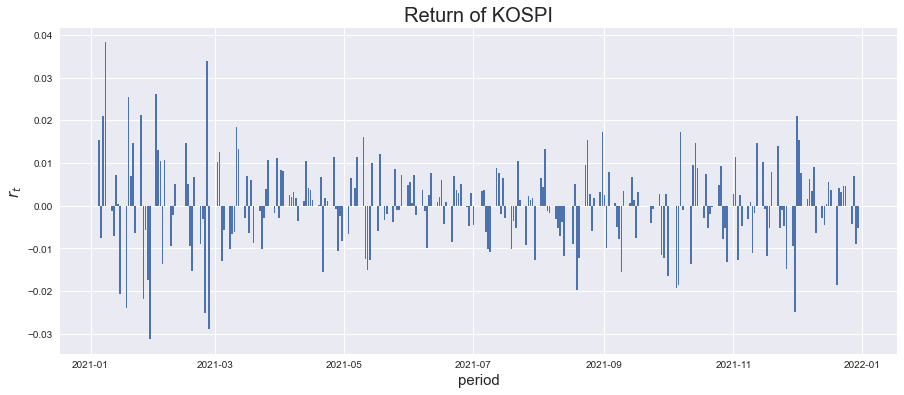

In [69]:
plt.style.use('seaborn')
plt.figure(figsize = (15,6))
plt.title('Return of KOSPI', fontsize = 20)
plt.xlabel('period', fontsize = 15)
plt.ylabel('$r_t$', fontsize = 15)
plt.bar(Ret.index, Ret.Return)

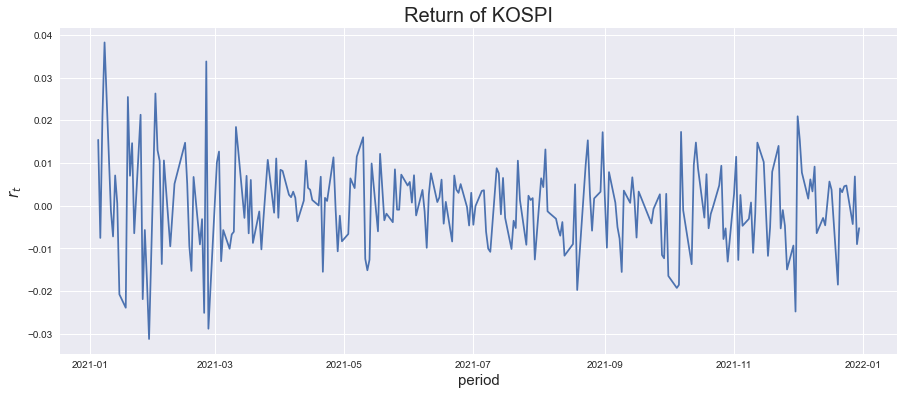

In [70]:
plt.style.use('seaborn')
plt.figure(figsize = (15,6))
plt.title('Return of KOSPI', fontsize = 20)
plt.xlabel('period', fontsize = 15)
plt.ylabel('$r_t$', fontsize = 15)
plt.plot(Ret.Return)

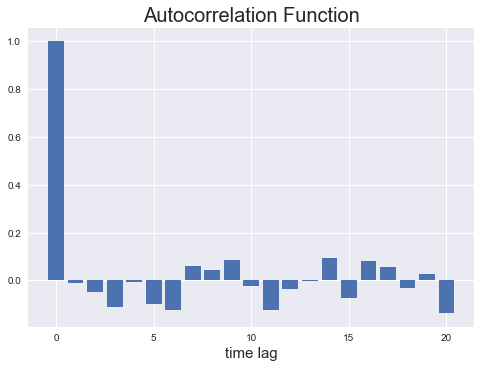

In [61]:
from statsmodels.tsa import stattools as tsa

n_lags = 20
atcf_qs = tsa.acf(Ret, nlags = n_lags, qstat = True)
temp = n_lags + 1

plt.title('Autocorrelation Function', fontsize = 20)
plt.xlabel('time lag', fontsize = 15)
plt.bar(range(temp), atcf_qs[0])
plt.show()

In [71]:
n_lags = 10
atcf_qs = tsa.acf(Ret, nlags = n_lags, qstat = True)
temp = n_lags + 1
atcf_qs[2]

array([0.86640966, 0.75366444, 0.30113844, 0.45218847, 0.29755988,
       0.12254235, 0.13831167, 0.17460143, 0.1417848 , 0.19159475])